# copyright @ahmadfurqan7

In [10]:
# import modules
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [11]:
# membaca semua data (read data)

covid_data = pd.read_csv("covid_19_indonesia_time_series_all.csv")


In [12]:
# set seed for reproducibilty
np.random.seed(0)

In [13]:
#Sekarang kita bisa melihat data yang hilang
covid_data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [14]:
#melihat data jumlah data yang hilang per kolom
missing_values_count = covid_data.isnull().sum()

#sekarang lihat poin yang hilang di sepuluh kolom pertama
missing_values_count[0:10]

Date                 0
Location ISO Code    0
Location             0
New Cases            0
New Deaths           0
New Recovered        0
New Active Cases     0
Total Cases          0
Total Deaths         0
Total Recovered      0
dtype: int64

In [15]:
# berapa banyak total nilai yang hilang
total_cells = np.product(covid_data.shape)
total_missing = missing_values_count.sum()

#persen data yang hilang
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

5.788200152823767


In [16]:
#hapus semua baris yang berisi nilai yang telah hilang
covid_data.dropna()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths


In [9]:
#hapus semua kolom dengan setidaknya satu nilai yang hilang

columns_with_na_dropped = covid_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,69.80,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%


In [10]:
#berapa banyak data yang hilang?

print("Columns in original dataset: %d \n" % covid_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 38 

Columns with na's dropped: 28


In [11]:
# MENGISI NILAI YANG HILANG SECARA OTOMATIS

covid_data.fillna(0)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,0.00,0.00
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,0.00,0.00
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,0.00,0.00
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


In [17]:
covid_data.fillna(method='bfill', axis=0).fillna(0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12328\962932730.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,1.00,1.00
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,1.00,1.00
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,1.00,1.00
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


In [14]:
#Get info from the dataframe
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [20]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [29]:
#Find if there's any duplicate data based on id
len(covid_data)-len(covid_data.drop_duplicates())

0

In [34]:
#Examine unique values in column location_iso_code, location, province, population, and population_density
print(covid_data['Location ISO Code'].unique(), "total unique values:", len(covid_data['Location ISO Code'].unique()))
print(covid_data['Location'].unique(), "total unique values:", len(covid_data['Location ISO Code'].unique()))
print(covid_data['Province'].unique(), "total unique values:", len(covid_data['Location ISO Code'].unique()))
print(covid_data['Population'].unique(), "total unique values:", len(covid_data['Location ISO Code'].unique()))
print(covid_data['Population Density'].unique(), "total unique values:", len(covid_data['Location ISO Code'].unique()))

['ID-JK' 'IDN' 'ID-RI' 'ID-JB' 'ID-BT' 'ID-JT' 'ID-SG' 'ID-BA' 'ID-KI'
 'ID-YO' 'ID-SU' 'ID-JI' 'ID-KR' 'ID-SN' 'ID-JA' 'ID-MA' 'ID-PA' 'ID-MU'
 'ID-SS' 'ID-AC' 'ID-KT' 'ID-LA' 'ID-ST' 'ID-SA' 'ID-SB' 'ID-PB' 'ID-KU'
 'ID-SR' 'ID-KB' 'ID-KS' 'ID-BB' 'ID-BE' 'ID-NB' 'ID-NT' 'ID-GO'] total unique values: 35
['DKI Jakarta' 'Indonesia' 'Riau' 'Jawa Barat' 'Banten' 'Jawa Tengah'
 'Sulawesi Tenggara' 'Bali' 'Kalimantan Timur'
 'Daerah Istimewa Yogyakarta' 'Sumatera Utara' 'Jawa Timur'
 'Kepulauan Riau' 'Sulawesi Selatan' 'Jambi' 'Maluku' 'Papua'
 'Maluku Utara' 'Sumatera Selatan' 'Aceh' 'Kalimantan Tengah' 'Lampung'
 'Sulawesi Tengah' 'Sulawesi Utara' 'Sumatera Barat' 'Papua Barat'
 'Kalimantan Utara' 'Sulawesi Barat' 'Kalimantan Barat'
 'Kalimantan Selatan' 'Kepulauan Bangka Belitung' 'Bengkulu'
 'Nusa Tenggara Barat' 'Nusa Tenggara Timur' 'Gorontalo'] total unique values: 35
['DKI Jakarta' nan 'Riau' 'Jawa Barat' 'Banten' 'Jawa Tengah'
 'Sulawesi Tenggara' 'Bali' 'Kalimantan Timur'
 'Daera

In [7]:
#Change datatype from column "date" to datetime64
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

#examine the dataframe again
covid_data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [6]:
#Let's see COVID-19 case growth in Indonesia
# pertumbuhan kasus covid di indonesia

date_case = covid_data.groupby(['Date'])[['New Cases']].sum().reset_index()
px.line(x=date_case['Date'],y=date_case['New Cases'], labels={'x': 'Date', 'y':'Total Cases'}, title ='Growth of COVID-19 in Indonesia')

In [8]:
#Now let's see total death cases due to COVID-19 in Indonesia throughout the years
# total kematian akibat covid 19 di indonesia

date_death = covid_data.groupby(['Date'])[['New Deaths']].sum().reset_index()
px.line(x=date_death['Date'],y=date_death['New Deaths'], labels={'x': 'Date', 'y':'Total Deaths'}, title ='Total Death Cases of COVID-19 in Indonesia')

In [9]:
#Let's analyze how many total cases, deaths, and recovered in each province
# analisis total kasus,kematian,kesembuhan tiap provinsi 

prov = covid_data.groupby(['Province','Population Density'])[['Total Cases', 'Total Recovered', 'Total Deaths']].max().reset_index(). sort_values(['Total Cases'], ascending=False)
prov['Death Percentage'] = (prov['Total Deaths']/prov['Total Cases'])*100
prov['Recovered Percentage'] = (prov['Total Recovered']/prov['Total Cases'])*100
print(prov.shape)
prov

(34, 7)


,Province,Population Density,Total Cases,Total Recovered,Total Deaths,Death Percentage,Recovered Percentage
4,DKI Jakarta,16334.31,1412511,1386134,15513,1.098257,98.132616
8,Jawa Barat,1276.55,1173731,1144358,15937,1.357807,97.497467
9,Jawa Tengah,1108.64,636409,601517,33489,5.262182,94.517362
10,Jawa Timur,846.78,601545,569003,31764,5.280403,94.590263
2,Banten,1109.64,333875,328482,2950,0.883564,98.384725
5,Daerah Istimewa Yogyakarta,1158.90,224307,217712,5928,2.642807,97.059833
14,Kalimantan Timur,27.52,209017,203022,5726,2.739490,97.131812
1,Bali,729.43,166831,161629,4731,2.835804,96.881874
33,Sumatera Utara,203.82,158866,154924,3288,2.069669,97.518664
25,Riau,69.80,152648,147973,4452,2.916514,96.937398


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12328\4191192816.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Province')

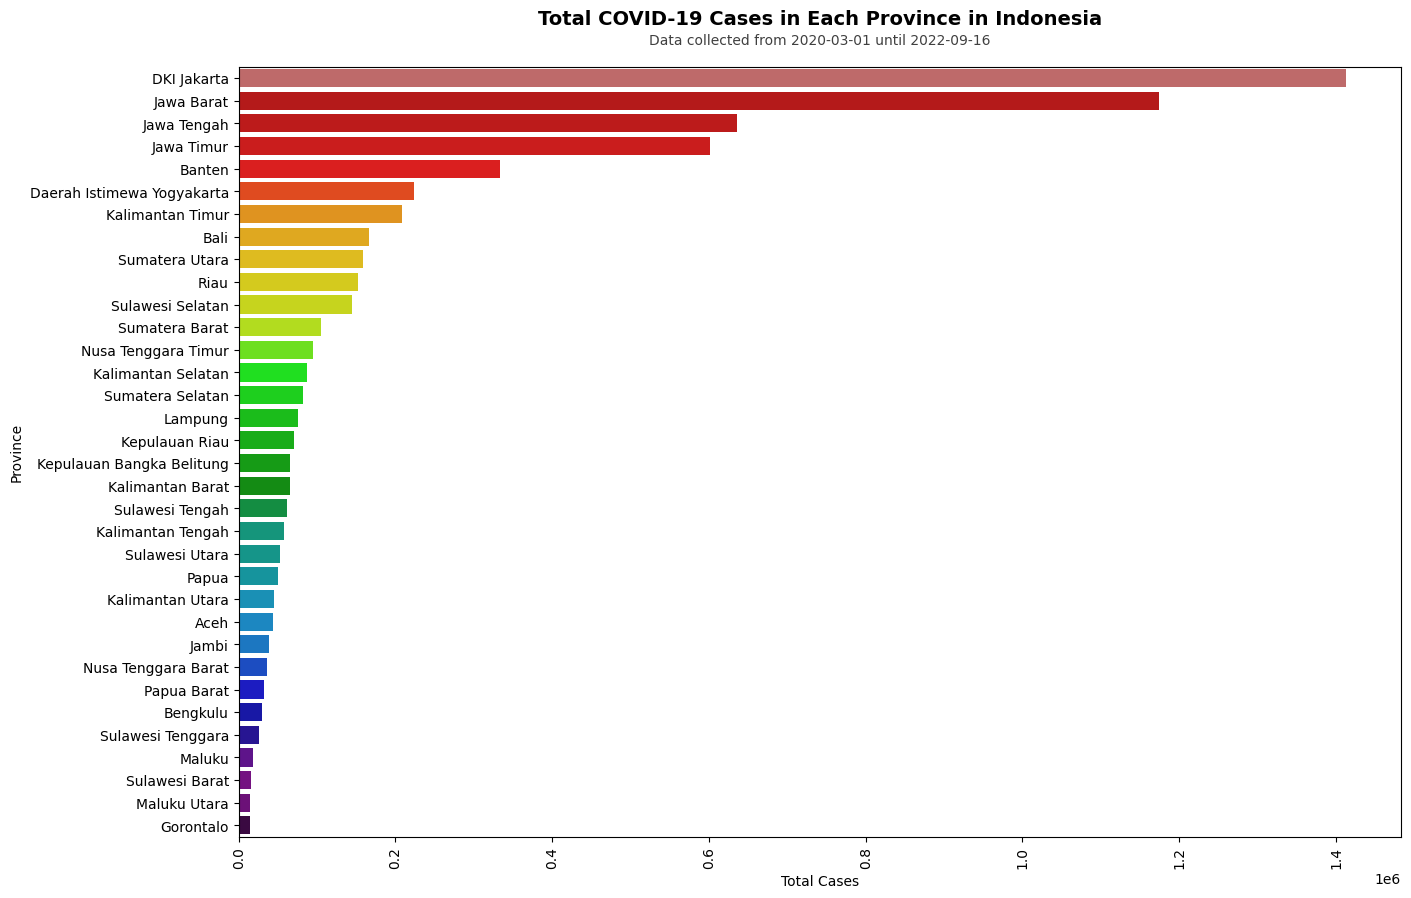

In [18]:
#Visualize the total case in each province

plt.figure(figsize=(15,10),dpi=100)
plt.xticks(rotation=90)
ax = sns.barplot(x=prov['Total Cases'], y=prov['Province'], palette="nipy_spectral_r")
ax.text(x=0.5, y=1.05, s='Total COVID-19 Cases in Each Province in Indonesia', fontsize=14, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.025, s='Data collected from 2020-03-01 until 2022-09-16', fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.xlabel('Total Cases')
plt.ylabel('Province')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12328\3493877595.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Total Recovered')

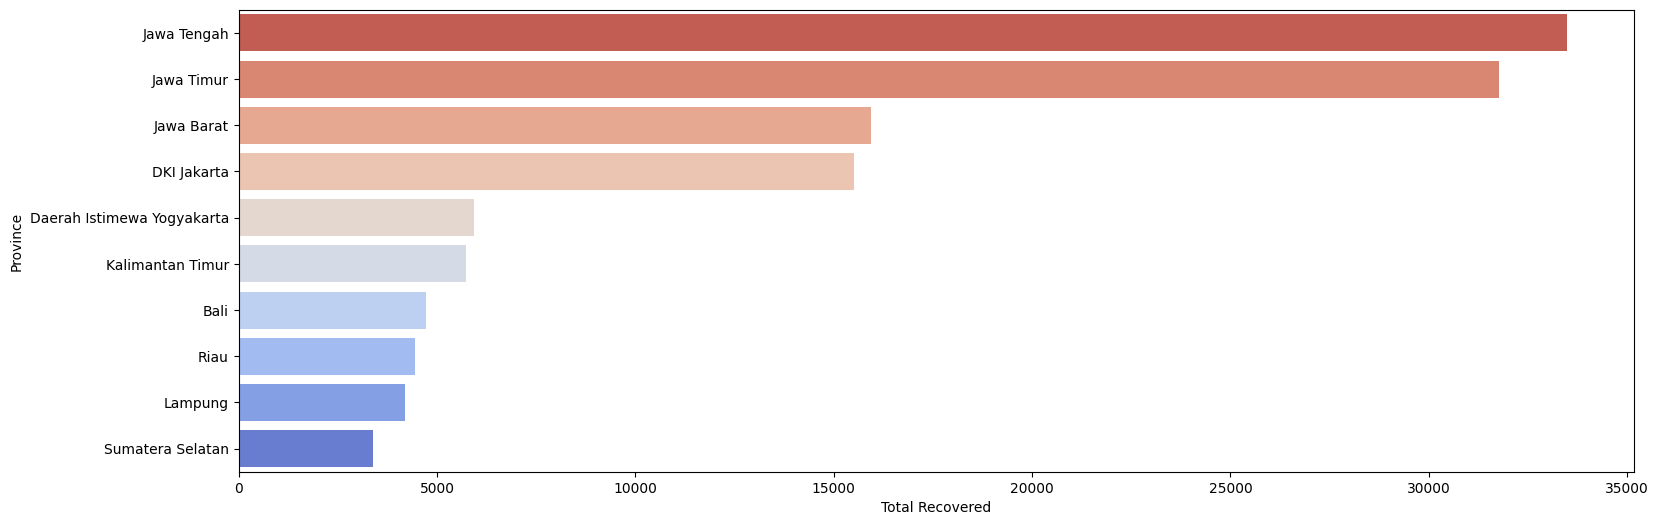

In [19]:
#Let's see the province with the most total deaths

top_10_deaths = prov.sort_values('Total Deaths', ascending=False).head(10)
plt.figure(figsize=(18,6), dpi=100)
sns.barplot(x=top_10_deaths['Total Deaths'],y=top_10_deaths['Province'], palette='coolwarm_r')
plt.ylabel('Province')
plt.xlabel('Total Recovered')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12328\2422806102.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Province')

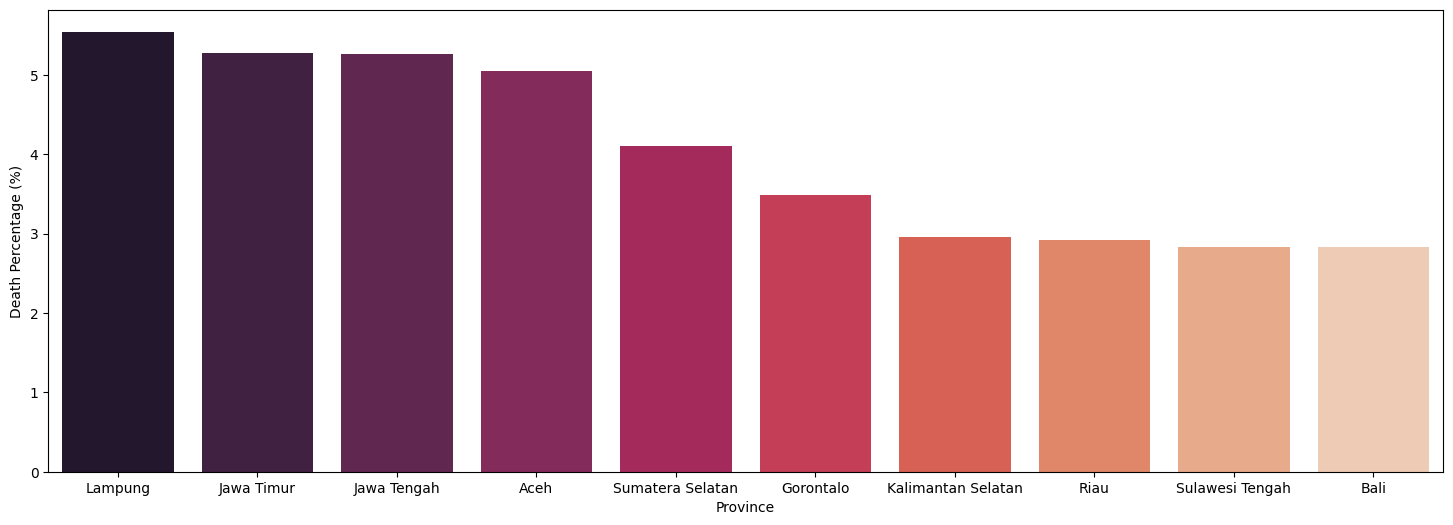

In [22]:
#Let's see the province with the highest death percentage

top_10_dp= prov.sort_values('Death Percentage', ascending=False).head(10)
plt.figure(figsize=(18,6), dpi=100)
sns.barplot(y=top_10_dp['Death Percentage'],x=top_10_dp['Province'], palette='rocket')
plt.ylabel('Death Percentage (%)')
plt.xlabel('Province')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12328\1650520189.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Total Recovered')

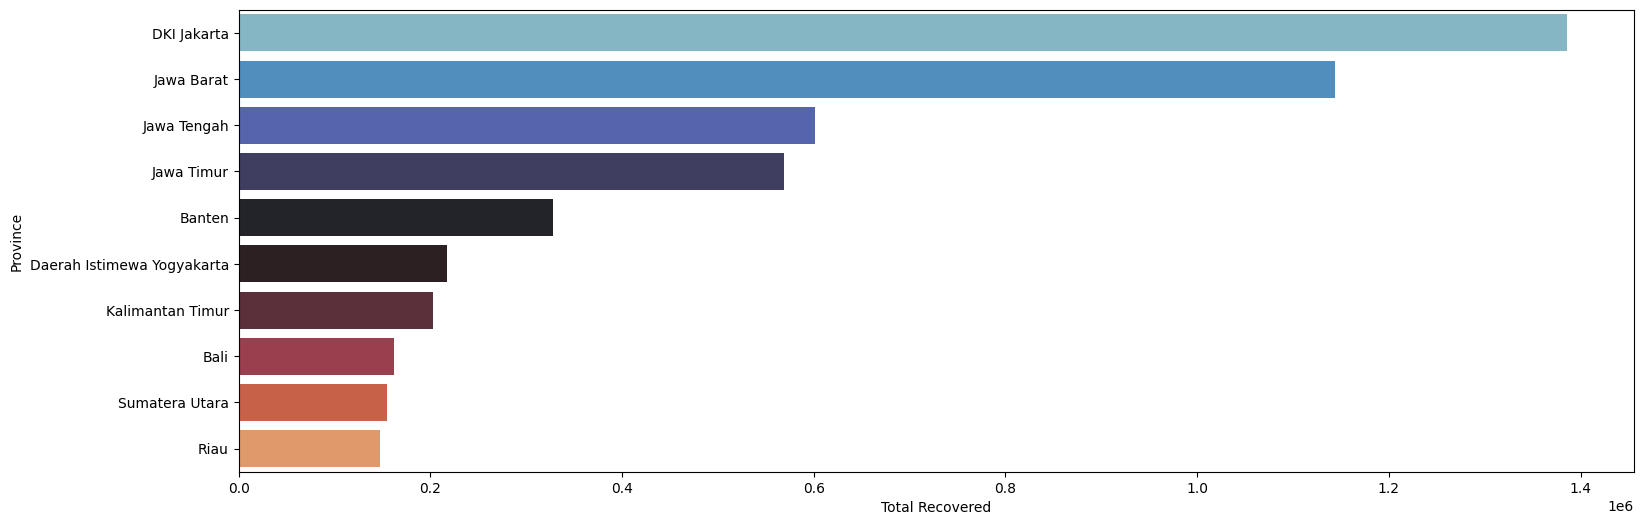

In [24]:
#Let's see the province with the most total recovered cases

top_10_rec = prov.sort_values('Total Recovered', ascending=False).head(10)
plt.figure(figsize=(18,6), dpi=100)
sns.barplot(x=top_10_rec['Total Recovered'],y=top_10_rec['Province'], palette='icefire')
plt.ylabel('Province')
plt.xlabel('Total Recovered')

# DONE
ANALYSIS COVID19 INDONESIA